# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import statsmodels.api as sm
import seaborn as sns

In [91]:
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [4]:
athletes = pd.read_csv("athletes.csv")

In [5]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [6]:
# Sua análise começa aqui.
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [93]:
def q1():
    # Retorne aqui o resultado da questão 1.
    
    return ( 1 - sct.shapiro(get_sample(athletes, 'height', n=3000, seed=42))[0] )  > 0.05
#q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

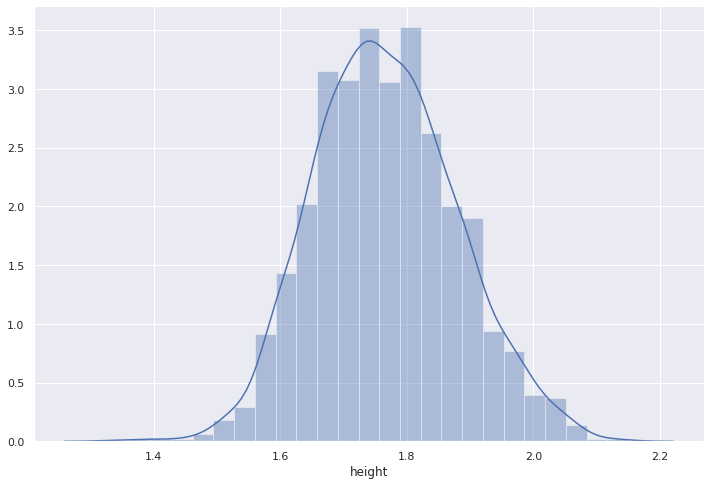

In [33]:
sns.distplot(get_sample(athletes, 'height', n=3000, seed=42), bins=25)

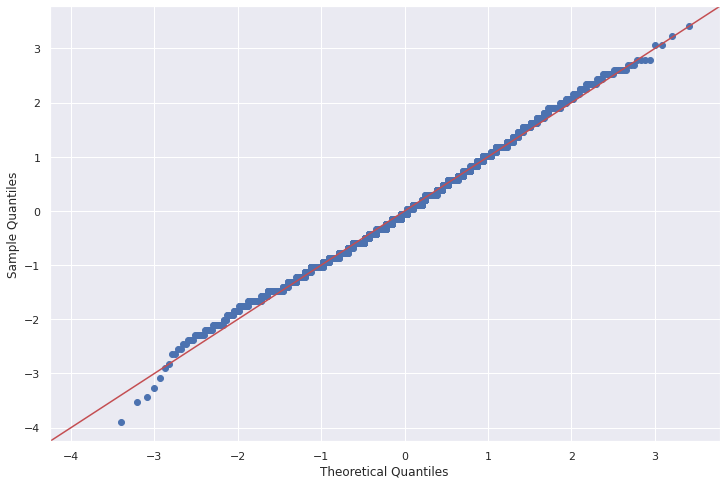

In [34]:
athletes_height = get_sample(athletes, 'height', n=3000, seed=42)
sm.qqplot(athletes_height, fit=True, line="45");

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [94]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return ( 1 - sct.jarque_bera(get_sample(athletes, 'height', n=3000, seed=42))[0] )  > 0.05
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [46]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return ( 1 - sct.normaltest(get_sample(athletes, 'weight', n=3000, seed=42))[0] )  > 0.05
#q3()

False

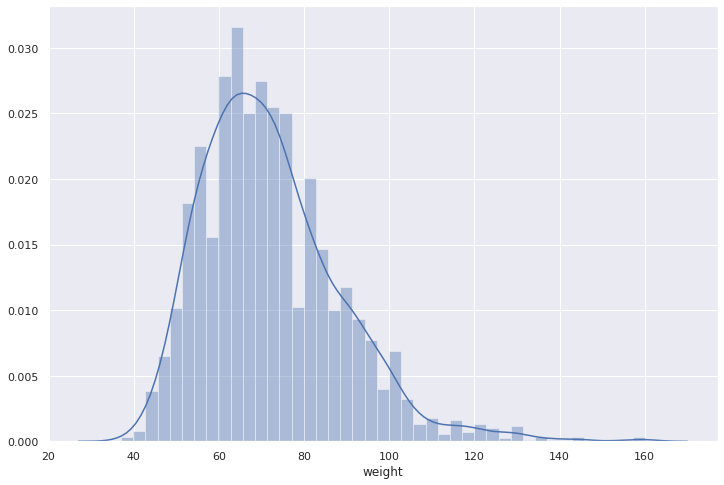

In [47]:
sns.distplot(get_sample(athletes, 'weight', n=3000, seed=42))

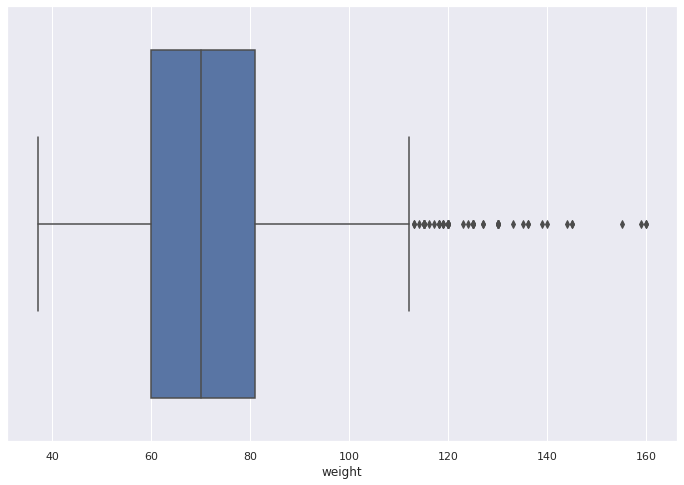

In [50]:
sns.boxplot(get_sample(athletes, 'weight', n=3000, seed=42))

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [65]:
def q4():
    # Retorne aqui o resultado da questão 4.
    log_athletes_sample = np.log1p(get_sample(athletes, 'weight', n=3000, seed=42))
    return ( 1 - sct.normaltest(log_athletes_sample)[0] )  > 0.05
#q4()

False

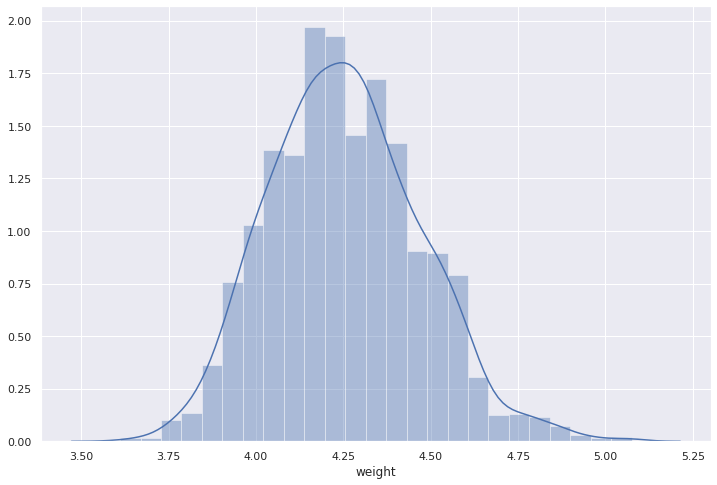

In [66]:
sns.distplot(np.log(get_sample(athletes, 'weight', n=3000, seed=42)), bins=25)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

In [79]:
countries = pd.read_csv('countries.csv')
countries['code'].unique()
bra = athletes[ (athletes['nationality'] == 'BRA') ]
usa = athletes[ (athletes['nationality'] == 'USA') ]
can = athletes[ (athletes['nationality'] == 'CAN') ]

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [80]:
athletes.sample()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
4816,619652365,Jesse Smith,USA,male,4/27/83,1.94,105.0,aquatics,0,0,0


In [108]:
def q5():
    
    return sct.ttest_ind(bra['height'], usa['height'], equal_var=False, nan_policy='omit')[1] > 0.05
#q5()

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [107]:
def q6():
    # Retorne aqui o resultado da questão 6.
    return sct.ttest_ind(bra['height'], can['height'], equal_var=False, nan_policy='omit')[1] > 0.05

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [106]:
def q7():
    # Retorne aqui o resultado da questão 7.
    return round(sct.ttest_ind(can['height'], usa['height'], equal_var=False, nan_policy='omit')[1], 8)
    #return sct.ttest_ind(usa['height'], can['height'], equal_var=False, nan_policy='omit')
q7()

0.00046601

Text(0.5, 0, 'Values')

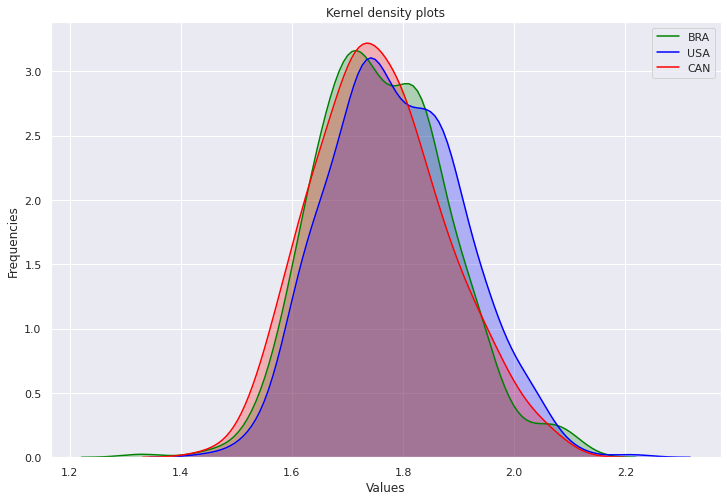

In [103]:
sns.kdeplot(bra['height'].dropna(), shade=True, label='BRA', color='green')
sns.kdeplot(usa['height'].dropna(), shade=True, label='USA', color='blue')
sns.kdeplot(can['height'].dropna(), shade=True, label='CAN', color='red')

plt.title('Kernel density plots')
plt.ylabel('Frequencies')
plt.xlabel('Values')

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?